In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# LOAD DATA
data=pd.read_csv('mobile data.csv')

In [4]:
data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [5]:
# head of the data
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [6]:
data=data.copy()
# drop the unnamed column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
catgorical_columns = data.select_dtypes(include=['object','float'])
catgorical_columns

,Model,Colour,Rear Camera,Front Camera,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,13MP,5MP,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,13MP,5MP,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,50MP,16MP,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,8MP,5MP,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,50MP,5MP,16.76,G37,"8,999"
...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,5MP,2MP,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,16.26,"Exynos 1380, Octa Core","38,999"


In [8]:
numerical_columns = data.select_dtypes(include=['int64'])
numerical_columns

,Memory,RAM,Battery_,AI Lens
0,64,4,6000,1
1,64,4,6000,1
2,128,8,5000,0
3,32,2,5000,0
4,128,8,5000,1
...,...,...,...,...
536,256,8,3900,0
537,32,2,3100,0
538,64,4,5000,0
539,128,8,5000,0


In [9]:
data['Prize'] = data['Prize'].str.replace(',', '').astype(int)

In [10]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 44.5+ KB


In [11]:
# columns of the data
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [12]:
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 44.5+ KB


In [14]:
# check duplicates
data.duplicated

<bound method DataFrame.duplicated of                      Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000      

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
numerical_column = data.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = data[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = data[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = data[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = data[(data[i] < LL) | (data[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    data[i] = np.where((data[i] < LL) | (data[i] > UL), data[i].mean(), data[i])
    m = data[(data[i] < LL) | (data[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column Memory is given by 64.0
The second quantile for the column Memory is given by 128.0
The third quantile for the column Memory is given by 128.0
The interquartile range for the column Memory is given by 64.0
The lower limit for the column Memory is given by -32.0
The upper limit for the column Memory is given by 224.0
The number of outliers for column Memory is given by 55
The number of outliers after imputation for column Memory is given by 0
   
   
The first quantile for the column RAM is given by 4.0
The second quantile for the column RAM is given by 6.0
The third quantile for the column RAM is given by 8.0
The interquartile range for the column RAM is given by 4.0
The lower limit for the column RAM is given by -2.0
The upper limit for the column RAM is given by 14.0
The number of outliers for column RAM is given by 0
The number of outliers after imputation for column RAM is given by 0
   
   
The first quantile for the column Battery_ is given by 50

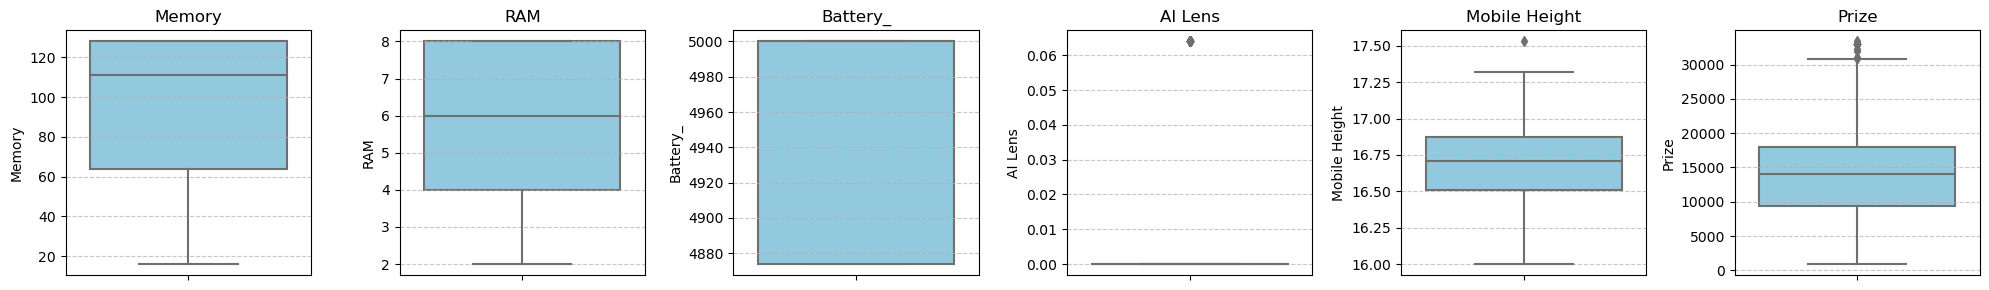

In [18]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical = data.select_dtypes(include=['number']).columns

num_cols = 6  # Number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Compute number of rows

plt.figure(figsize=(20, num_rows * 3))  # Adjust figure size dynamically

for i, col in enumerate(numerical, 1):  # Loop through numerical columns
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=data[col], color='skyblue')  # Add color for better visuals
    plt.title(col)
    plt.xlabel('')  # Remove x-axis label for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots


In [19]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(data['Mobile Height'])
data['Mobile Height'] = np.where(data['Mobile Height']>upper_limit_iqr,upper_limit_iqr,np.where(data['Mobile Height']<lower_limit_iqr,lower_limit_iqr,data['Mobile Height']))

<Axes: >

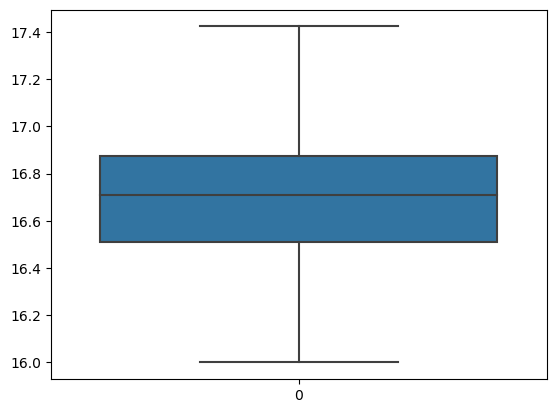

In [20]:
sns.boxplot(data['Mobile Height'])

In [21]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(data['Prize'])
data['Prize'] = np.where(data['Prize']>upper_limit_iqr,upper_limit_iqr,np.where(data['Prize']<lower_limit_iqr,lower_limit_iqr,data['Prize']))

<Axes: >

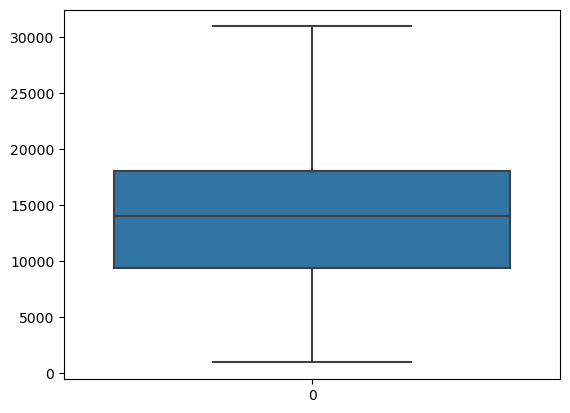

In [22]:
sns.boxplot(data['Prize'])

In [23]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(data['AI Lens'])
data['AI Lens'] = np.where(data['AI Lens']>upper_limit_iqr,upper_limit_iqr,np.where(data['AI Lens']<lower_limit_iqr,lower_limit_iqr,data['AI Lens']))

<Axes: >

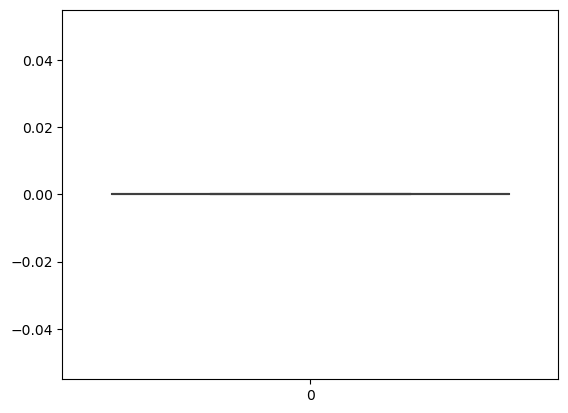

In [24]:
sns.boxplot(data['AI Lens'])

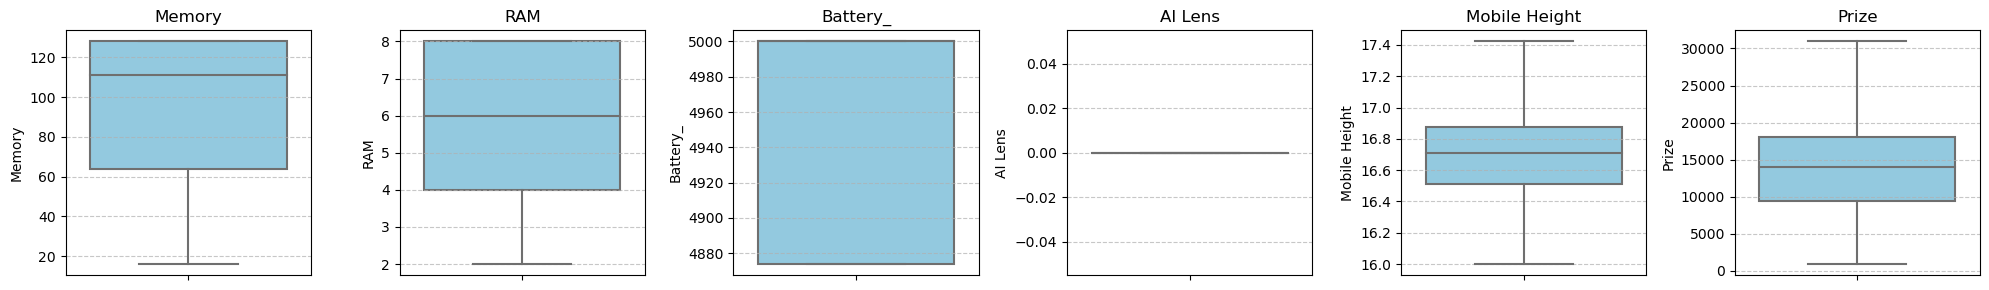

In [25]:

# Select only numerical columns
numerical = data.select_dtypes(include=['number']).columns

num_cols = 6  # Number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Compute number of rows

plt.figure(figsize=(20, num_rows * 3))  # Adjust figure size dynamically

for i, col in enumerate(numerical, 1):  # Loop through numerical columns
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=data[col], color='skyblue')  # Add color for better visuals
    plt.title(col)
    plt.xlabel('')  # Remove x-axis label for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots


In [26]:
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


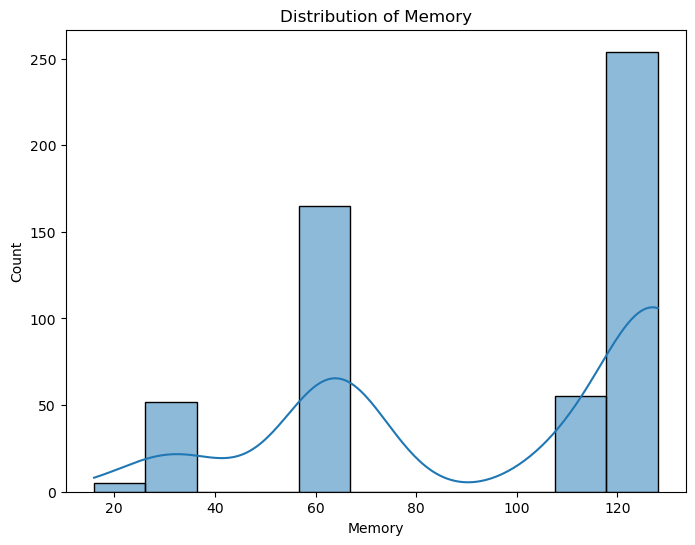

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


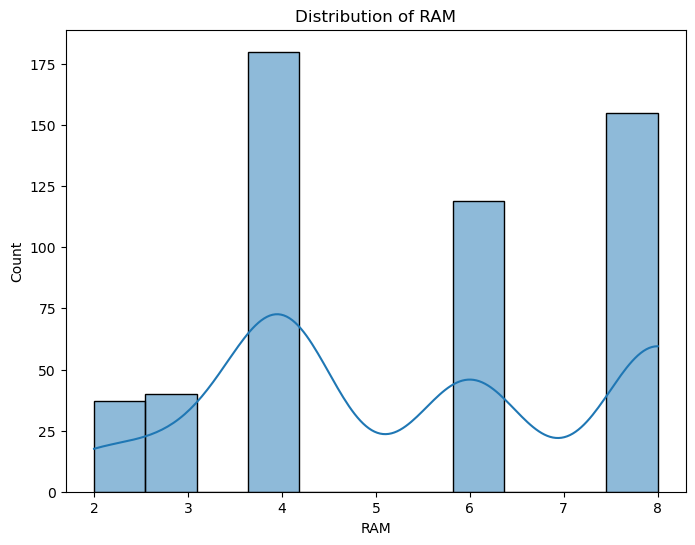

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


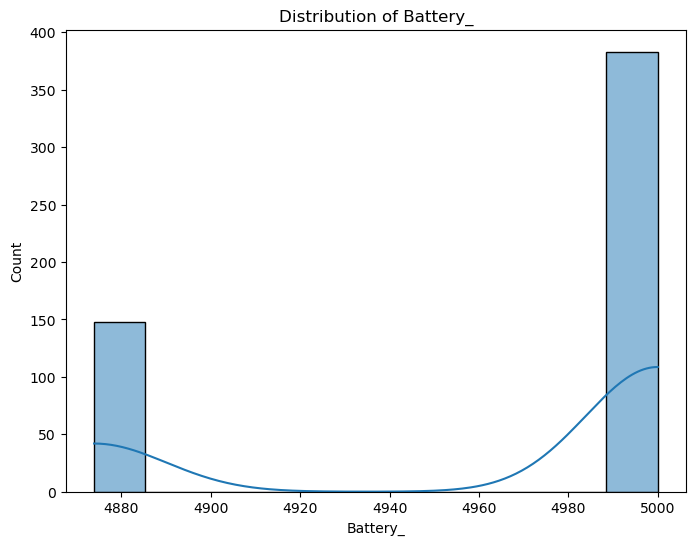

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


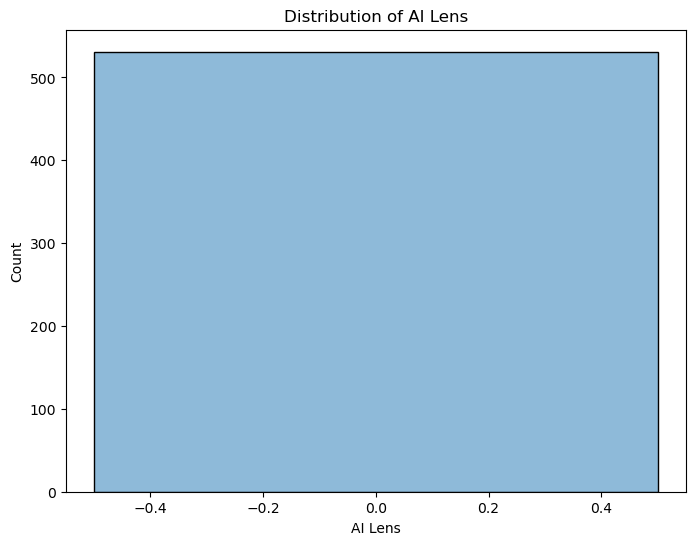

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


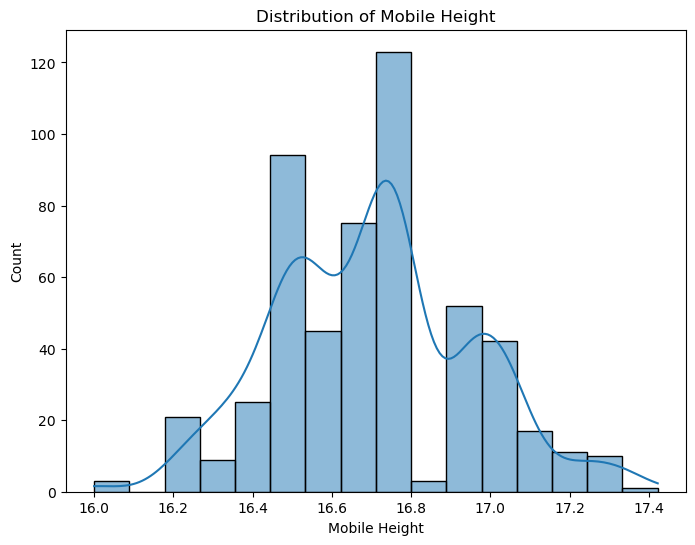

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


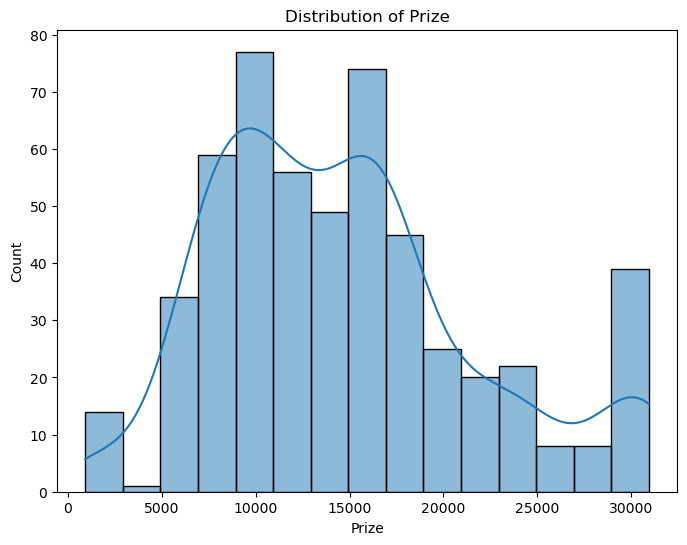

In [27]:
numeric_vars = ['Memory', 'RAM', 'Battery_', 'AI Lens','Mobile Height','Prize']
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


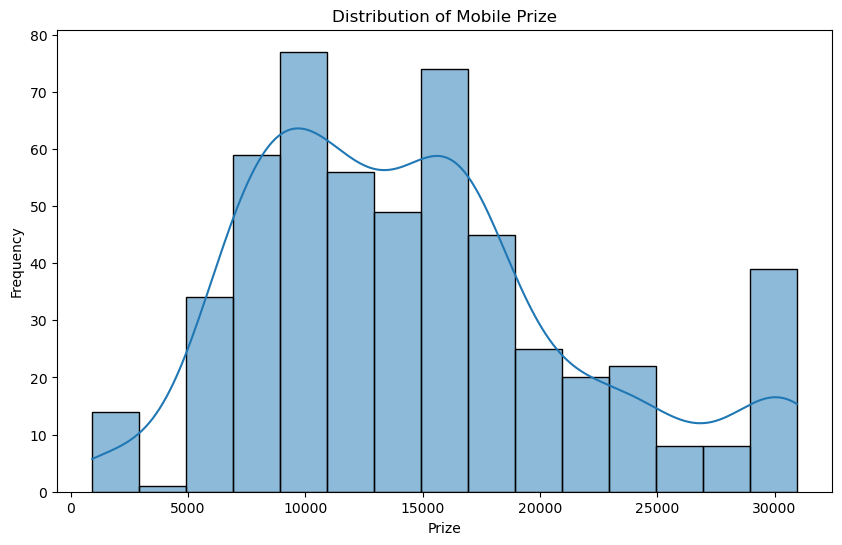

In [28]:
# Univariate analysis for Mobile data
plt.figure(figsize=(10, 6))
sns.histplot(data['Prize'], kde=True)
plt.title('Distribution of Mobile Prize')
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.show()

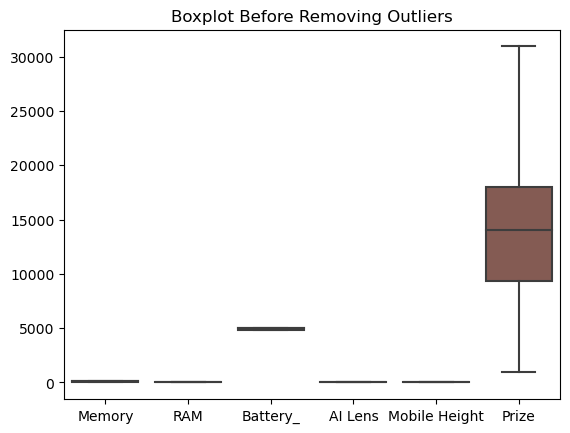

In [29]:
# boxplot for Mobile data
sns.boxplot(data=data)
plt.title("Boxplot Before Removing Outliers")
plt.show()

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


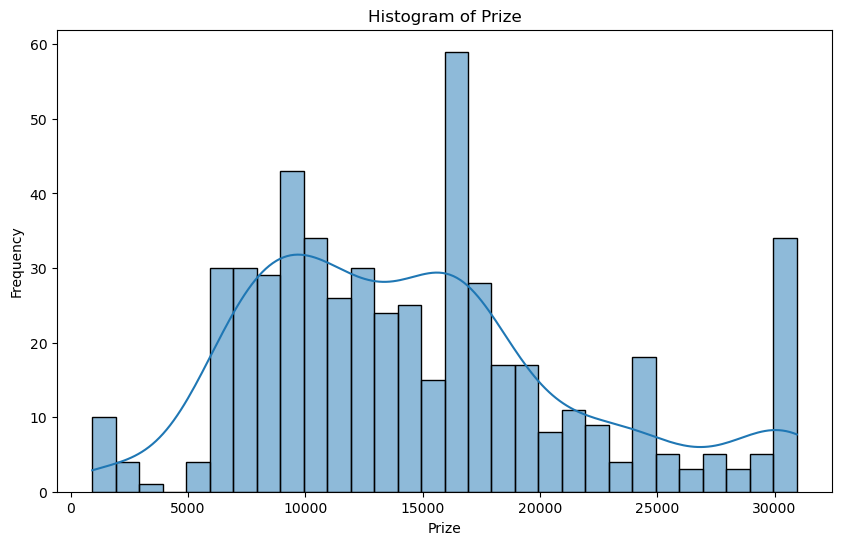

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Prize', bins=30, kde=True)
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.title('Histogram of Prize')
plt.show()

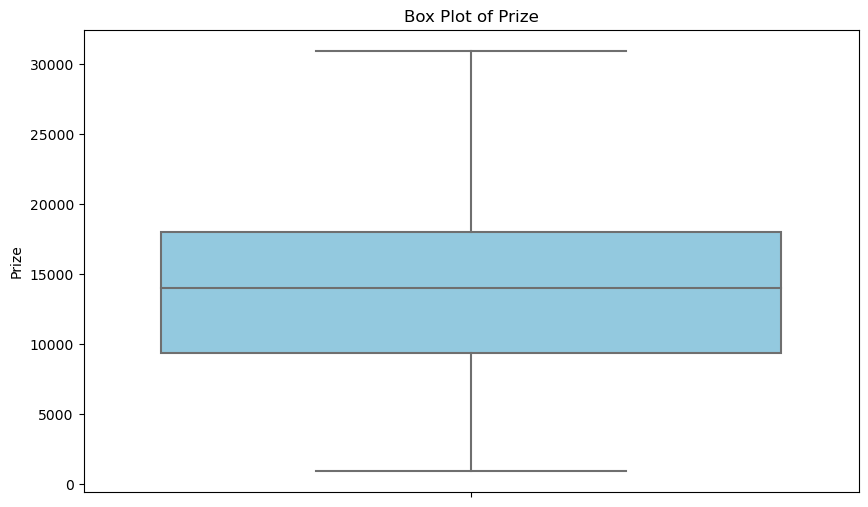

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Prize',color='skyblue')
plt.ylabel('Prize')
plt.title('Box Plot of Prize')
plt.show()

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


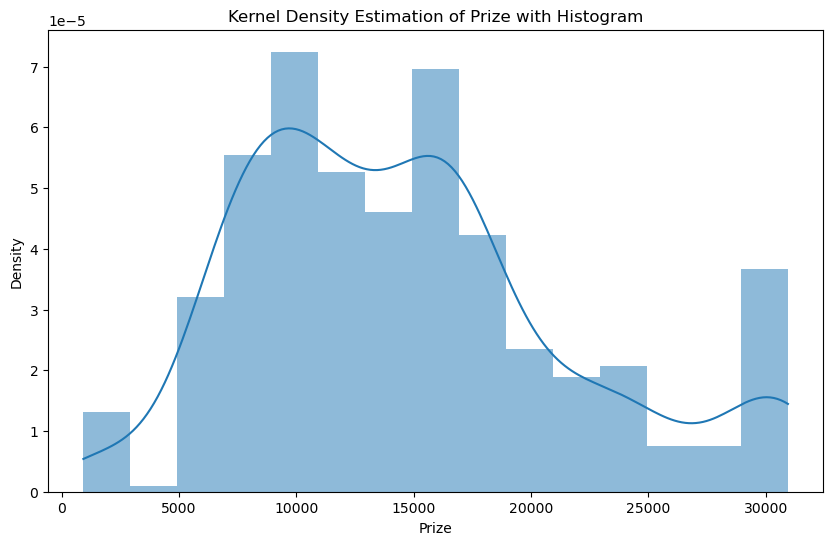

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data['Prize'], kde=True, stat="density", linewidth=0) # stat="density" is crucial here
plt.xlabel('Prize')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Prize with Histogram')
plt.show()

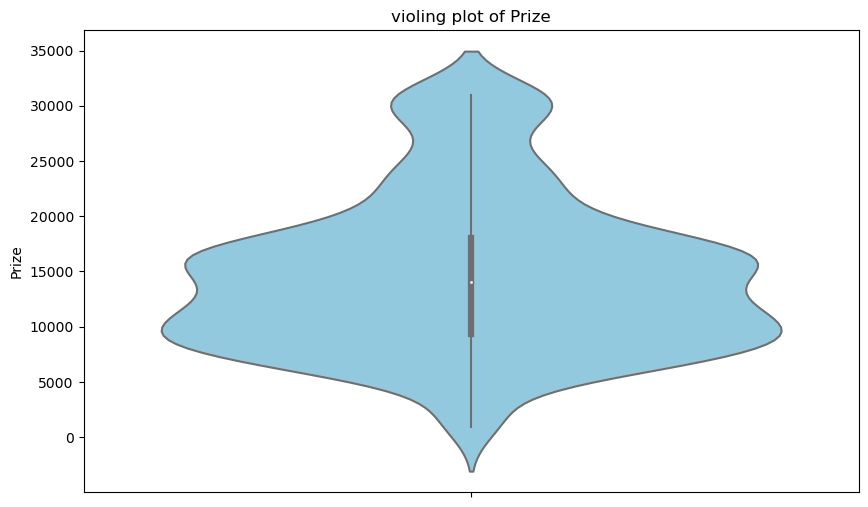

In [33]:
# voline Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='Prize' , color='skyblue')
plt.ylabel
plt.title('violing plot of Prize')
plt.show()

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

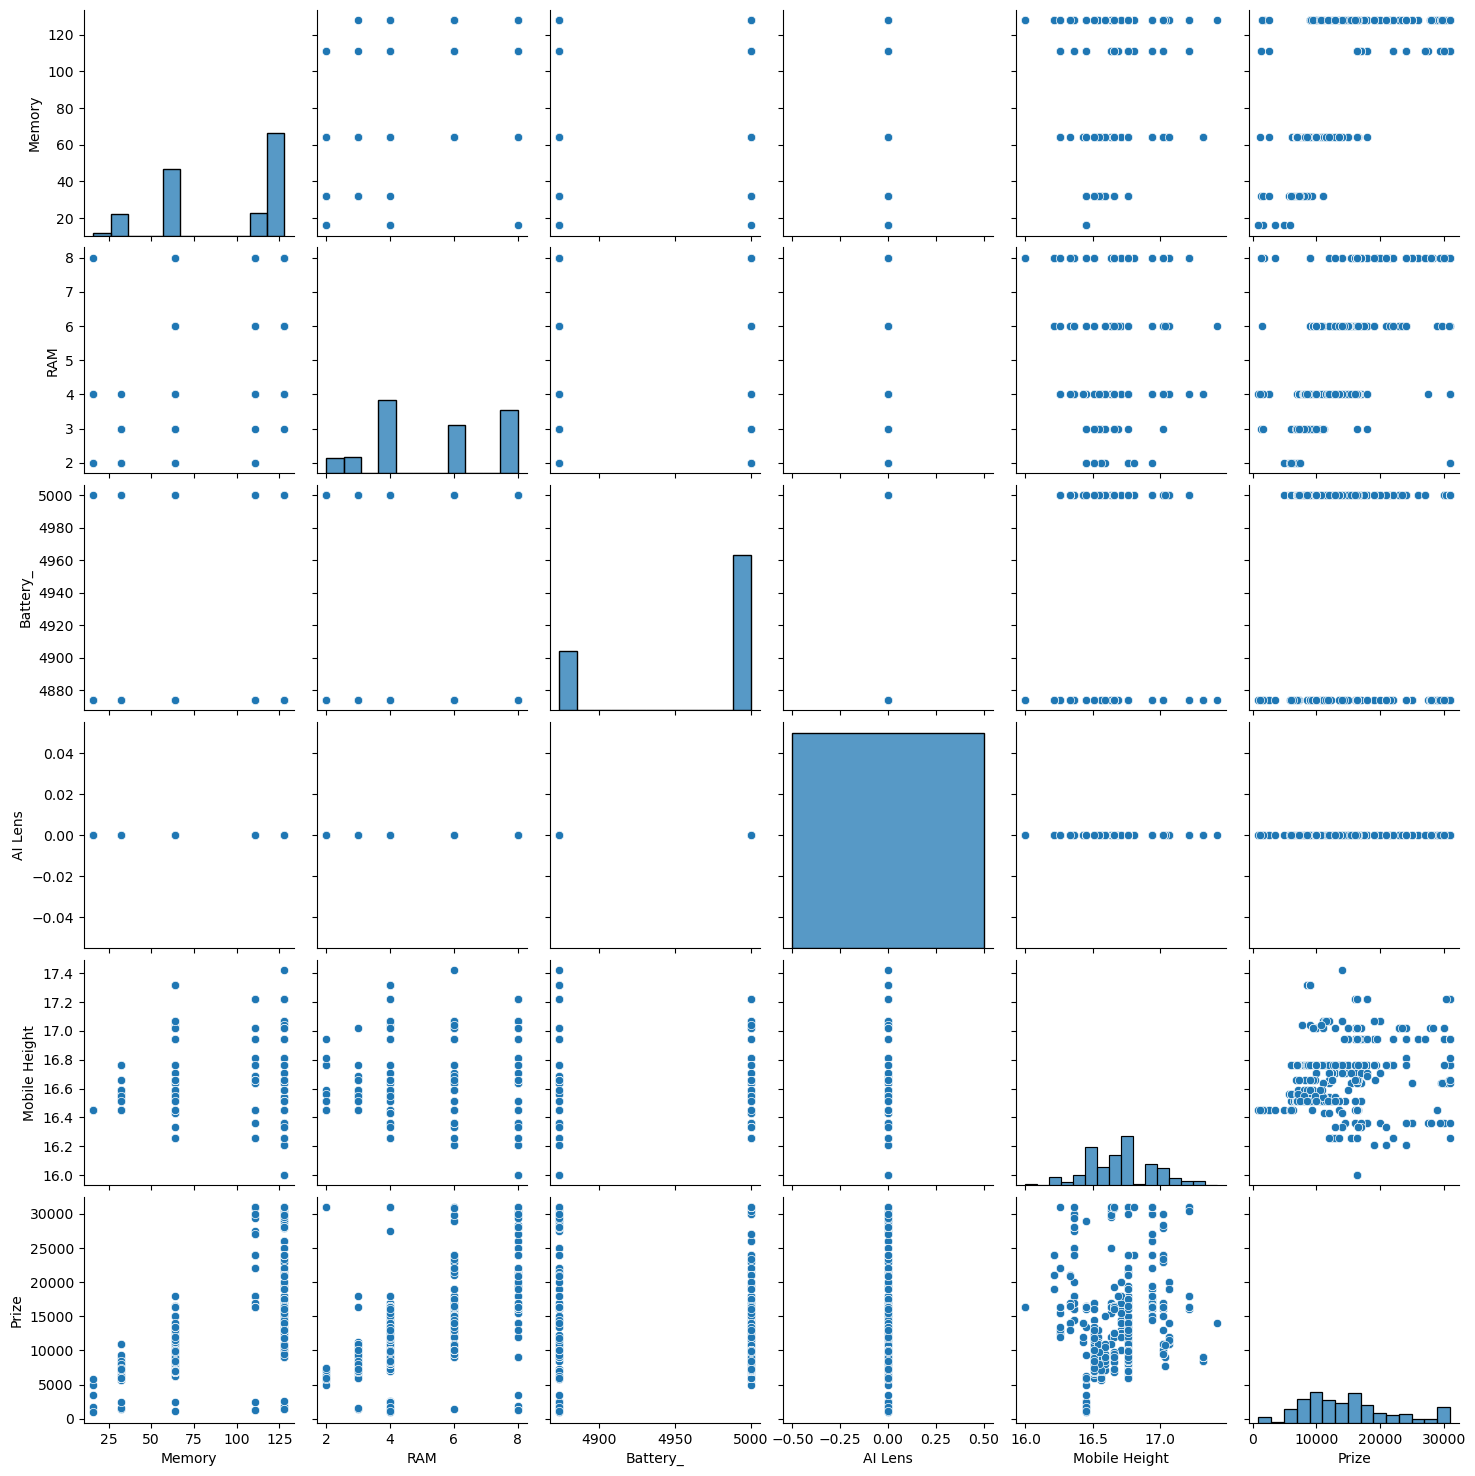

In [34]:
# Pairplot
sns.pairplot(data)
plt.show()

In [35]:
numeric_data = data.select_dtypes(include=['number'])
cor = numeric_data.corr()


In [36]:
data = data.fillna(0)  # Or use another imputation method


In [37]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

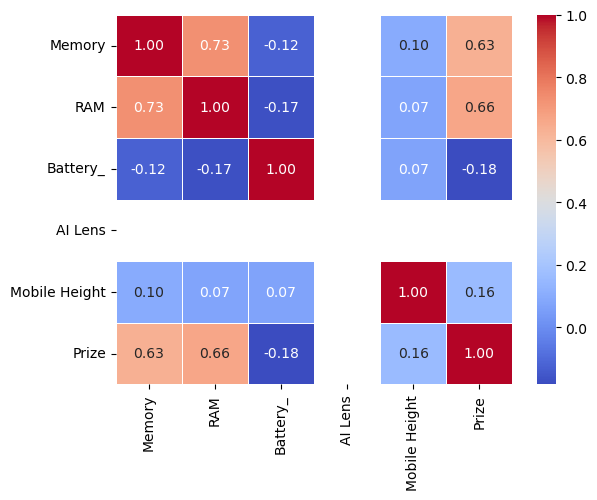

In [38]:
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)


<Axes: >

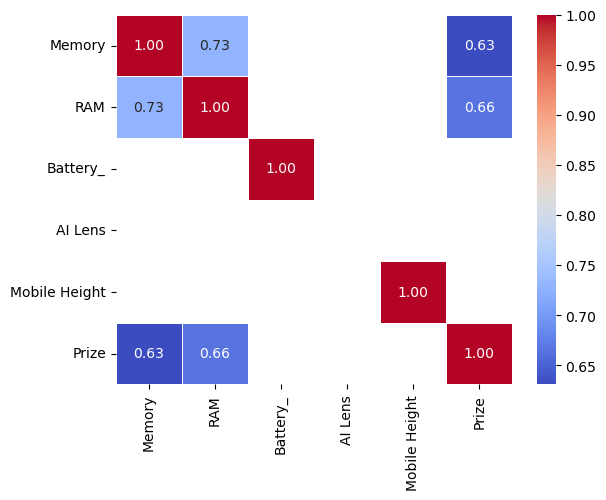

In [39]:
cor_filtered = cor[(cor >= 0.5) | (cor <= -0.5)]
sns.heatmap(cor_filtered, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)


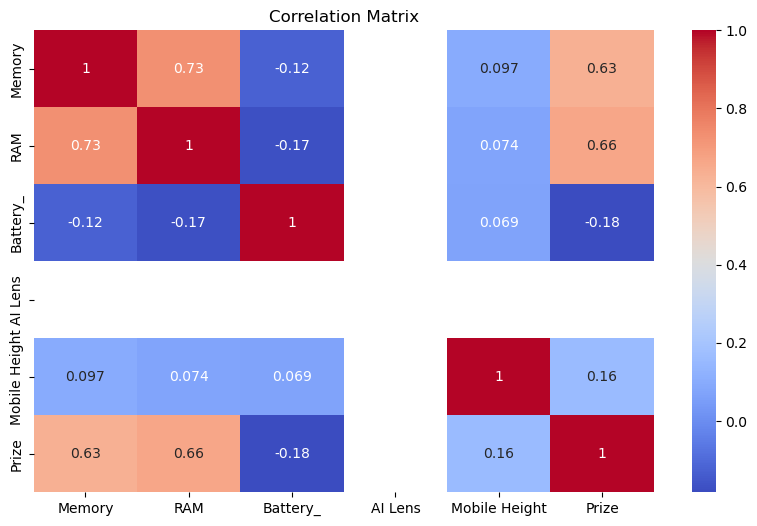

In [40]:
numerical_data = data.select_dtypes(include=['number'])
corr= numerical_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [41]:
#feature selection
data['Memory_price'] = data['Memory'] / data['Prize']
data['RAM_price'] = data['RAM'] / data['Prize']
data['Battery_price'] = data['Battery_'] / data['Prize']
#data['Process_price'] = data['Processor_'] / data['Prize']


In [42]:
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Memory_price,RAM_price,Battery_price
0,Infinix SMART 7,Night Black,64.000000,4.0,4873.877589,13MP,5MP,0.0,16.760000,Unisoc Spreadtrum SC9863A1,7299.000000,0.008768,0.000548,0.667746
1,Infinix SMART 7,Azure Blue,64.000000,4.0,4873.877589,13MP,5MP,0.0,16.760000,Unisoc Spreadtrum SC9863A1,7299.000000,0.008768,0.000548,0.667746
2,MOTOROLA G32,Mineral Gray,128.000000,8.0,5000.000000,50MP,16MP,0.0,16.640000,Qualcomm Snapdragon 680,11999.000000,0.010668,0.000667,0.416701
3,POCO C50,Royal Blue,32.000000,2.0,5000.000000,8MP,5MP,0.0,16.560000,Mediatek Helio A22,5649.000000,0.005665,0.000354,0.885112
4,Infinix HOT 30i,Marigold,128.000000,8.0,5000.000000,50MP,5MP,0.0,16.760000,G37,8999.000000,0.014224,0.000889,0.555617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,110.915254,8.0,4873.877589,50MP,12MP,0.0,16.450019,Qualcomm Snapdragon 8 Gen 2,16305.775895,0.006802,0.000491,0.298905
537,LAVA Z21,Cyan,32.000000,2.0,4873.877589,5MP,2MP,0.0,16.450019,Octa Core,5998.000000,0.005335,0.000333,0.812584
538,Tecno Spark 8T,Turquoise Cyan,64.000000,4.0,5000.000000,50MP,8MP,0.0,16.760000,MediaTek Helio G35,9990.000000,0.006406,0.000400,0.500501
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.000000,8.0,5000.000000,50MP,32MP,0.0,16.260000,"Exynos 1380, Octa Core",16305.775895,0.007850,0.000491,0.306640


In [43]:
data.dtypes

Model             object
Colour            object
Memory           float64
RAM              float64
Battery_         float64
Rear Camera       object
Front Camera      object
AI Lens          float64
Mobile Height    float64
Processor_        object
Prize            float64
Memory_price     float64
RAM_price        float64
Battery_price    float64
dtype: object

In [44]:
labelencoder = LabelEncoder()
data['Model']=labelencoder.fit_transform(data['Model'])
data['Colour']=labelencoder.fit_transform(data['Colour'])
data['Rear Camera']=labelencoder.fit_transform(data['Rear Camera'])
data['Front Camera']=labelencoder.fit_transform(data['Front Camera'])
data['Processor_']=labelencoder.fit_transform(data['Processor_'])




In [45]:
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Memory_price,RAM_price,Battery_price
0,23,159,64.000000,4.0,4873.877589,3,10,0.0,16.760000,113,7299.000000,0.008768,0.000548,0.667746
1,23,20,64.000000,4.0,4873.877589,3,10,0.0,16.760000,113,7299.000000,0.008768,0.000548,0.667746
2,37,149,128.000000,8.0,5000.000000,10,4,0.0,16.640000,75,11999.000000,0.010668,0.000667,0.416701
3,69,201,32.000000,2.0,5000.000000,13,10,0.0,16.560000,56,5649.000000,0.005665,0.000354,0.885112
4,12,130,128.000000,8.0,5000.000000,10,10,0.0,16.760000,14,8999.000000,0.014224,0.000889,0.555617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,110.915254,8.0,4873.877589,10,2,0.0,16.450019,89,16305.775895,0.006802,0.000491,0.298905
537,32,52,32.000000,2.0,4873.877589,11,6,0.0,16.450019,68,5998.000000,0.005335,0.000333,0.812584
538,123,259,64.000000,4.0,5000.000000,10,12,0.0,16.760000,35,9990.000000,0.006406,0.000400,0.500501
539,110,17,128.000000,8.0,5000.000000,10,7,0.0,16.260000,11,16305.775895,0.007850,0.000491,0.306640


In [46]:
data.drop(['AI Lens'], axis=1, inplace=True)

                  Model    Colour    Memory       RAM  Battery_  Rear Camera  \
Model          1.000000  0.101375  0.078945  0.004135  0.033273     0.046744   
Colour         0.101375  1.000000  0.090158  0.065547 -0.061938     0.069547   
Memory         0.078945  0.090158  1.000000  0.728514 -0.123513    -0.031940   
RAM            0.004135  0.065547  0.728514  1.000000 -0.172350    -0.031854   
Battery_       0.033273 -0.061938 -0.123513 -0.172350  1.000000     0.129814   
Rear Camera    0.046744  0.069547 -0.031940 -0.031854  0.129814     1.000000   
Front Camera  -0.078822 -0.010572 -0.346336 -0.438407  0.176319     0.108547   
Mobile Height -0.241758  0.030019  0.097382  0.074063  0.068955    -0.083232   
Processor_     0.038342 -0.073121 -0.146104 -0.110272  0.050923    -0.029680   
Prize          0.111235  0.061354  0.631119  0.664508 -0.182160     0.050054   
Memory_price   0.009296 -0.009495  0.135971  0.024149 -0.177945    -0.250721   
RAM_price      0.033664 -0.034264 -0.051

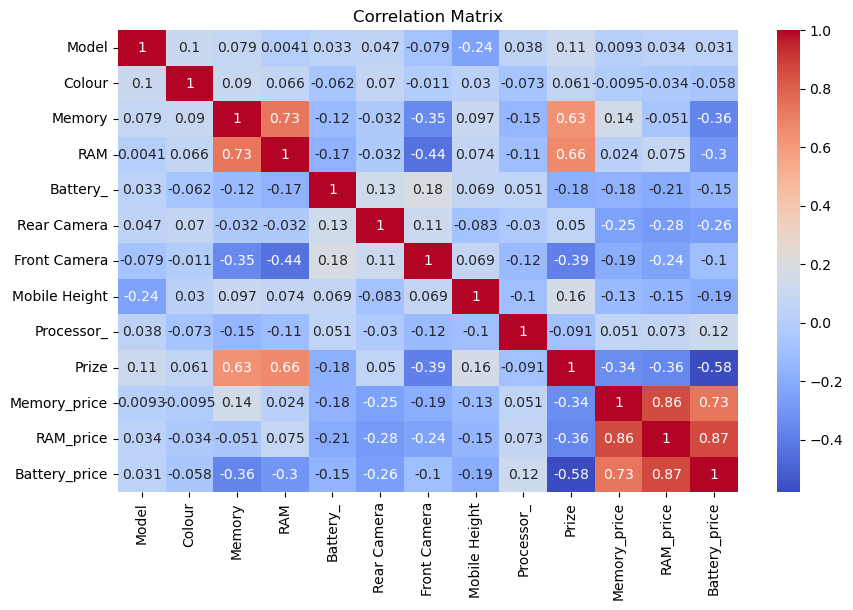

In [47]:
corr = data.corr()
print(corr)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [48]:
# Feature Engineering
data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Memory_price,RAM_price,Battery_price
0,23,159,64.0,4.0,4873.877589,3,10,16.76,113,7299.0,0.008768,0.000548,0.667746
1,23,20,64.0,4.0,4873.877589,3,10,16.76,113,7299.0,0.008768,0.000548,0.667746
2,37,149,128.0,8.0,5000.000000,10,4,16.64,75,11999.0,0.010668,0.000667,0.416701
3,69,201,32.0,2.0,5000.000000,13,10,16.56,56,5649.0,0.005665,0.000354,0.885112
4,12,130,128.0,8.0,5000.000000,10,10,16.76,14,8999.0,0.014224,0.000889,0.555617


In [49]:
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'Mobile Height', 'Processor_', 'Prize', 'Memory_price',
       'RAM_price', 'Battery_price'],
      dtype='object')

In [50]:
data.shape

(531, 13)

In [51]:
data['Memory_price'] = data['Memory'] / data['Prize']


In [52]:
data['Memory_price']

0      0.008768
1      0.008768
2      0.010668
3      0.005665
4      0.014224
         ...   
536    0.006802
537    0.005335
538    0.006406
539    0.007850
540    0.008001
Name: Memory_price, Length: 531, dtype: float64

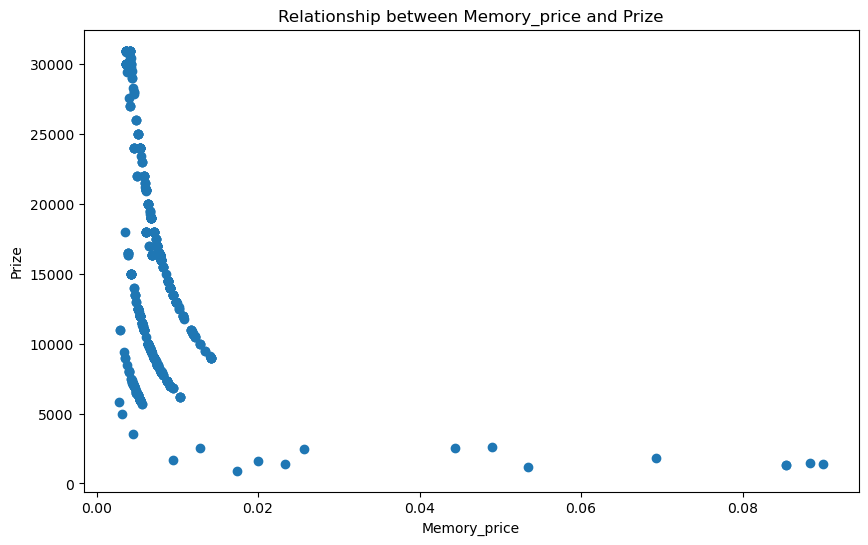

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Memory_price'],data['Prize'])
plt.xlabel('Memory_price')
plt.ylabel('Prize')
plt.title('Relationship between Memory_price and Prize')
plt.show()

In [54]:
data['RAM_price'] = data['RAM'] / data['Prize']


In [55]:
data['RAM_price']

0      0.000548
1      0.000548
2      0.000667
3      0.000354
4      0.000889
         ...   
536    0.000491
537    0.000333
538    0.000400
539    0.000491
540    0.000250
Name: RAM_price, Length: 531, dtype: float64

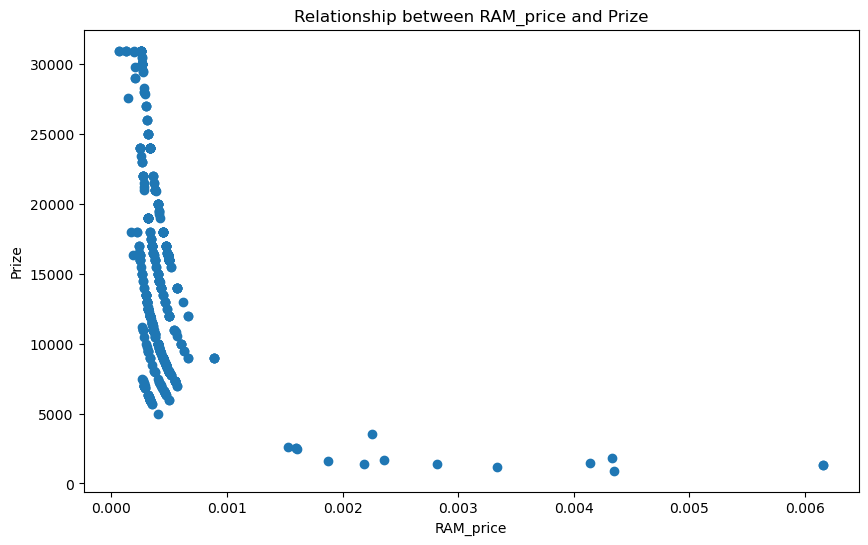

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(data['RAM_price'],data['Prize'])
plt.xlabel('RAM_price')
plt.ylabel('Prize')
plt.title('Relationship between RAM_price and Prize')
plt.show()

In [57]:
data['Battery_price'] = data['Battery_'] / data['Prize']

In [58]:
data['Battery_price']

0      0.667746
1      0.667746
2      0.416701
3      0.885112
4      0.555617
         ...   
536    0.298905
537    0.812584
538    0.500501
539    0.306640
540    0.312520
Name: Battery_price, Length: 531, dtype: float64

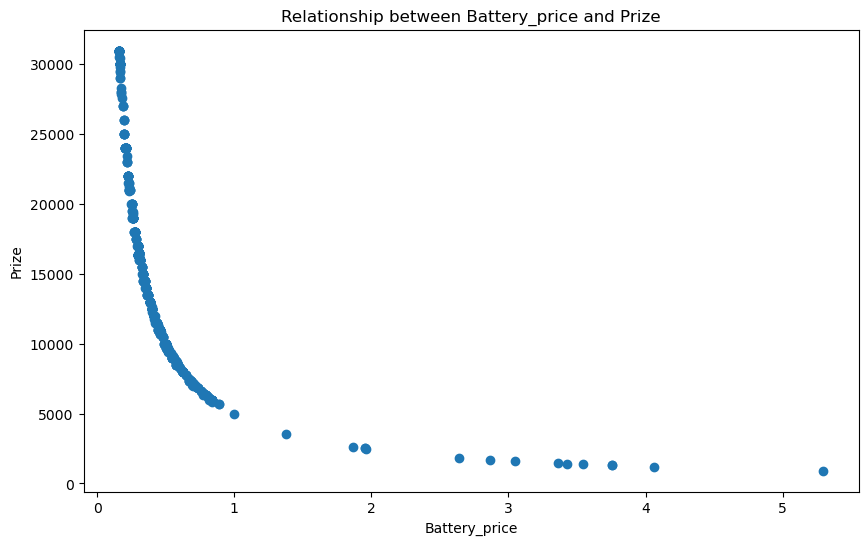

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Battery_price'],data['Prize'])
plt.xlabel('Battery_price')
plt.ylabel('Prize')
plt.title('Relationship between Battery_price and Prize')
plt.show()

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


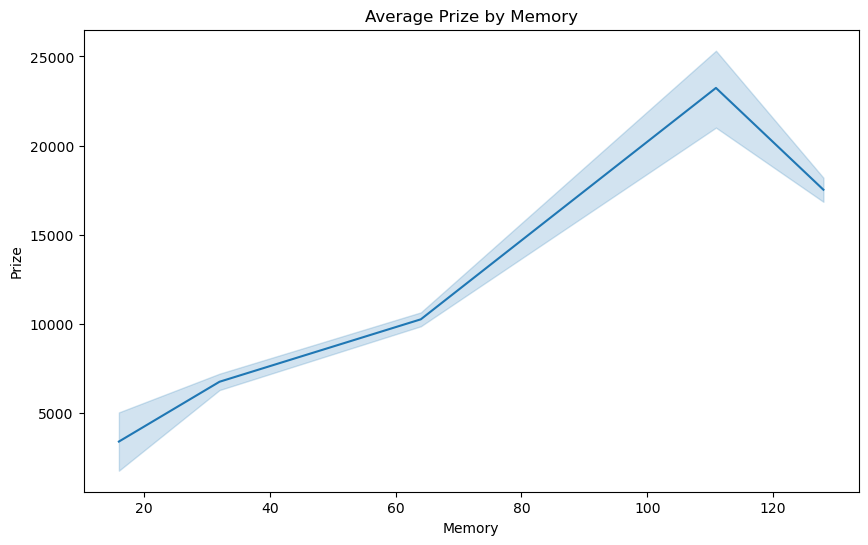

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Memory', y='Prize', data=data)
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.title('Average Prize by Memory')
plt.show()


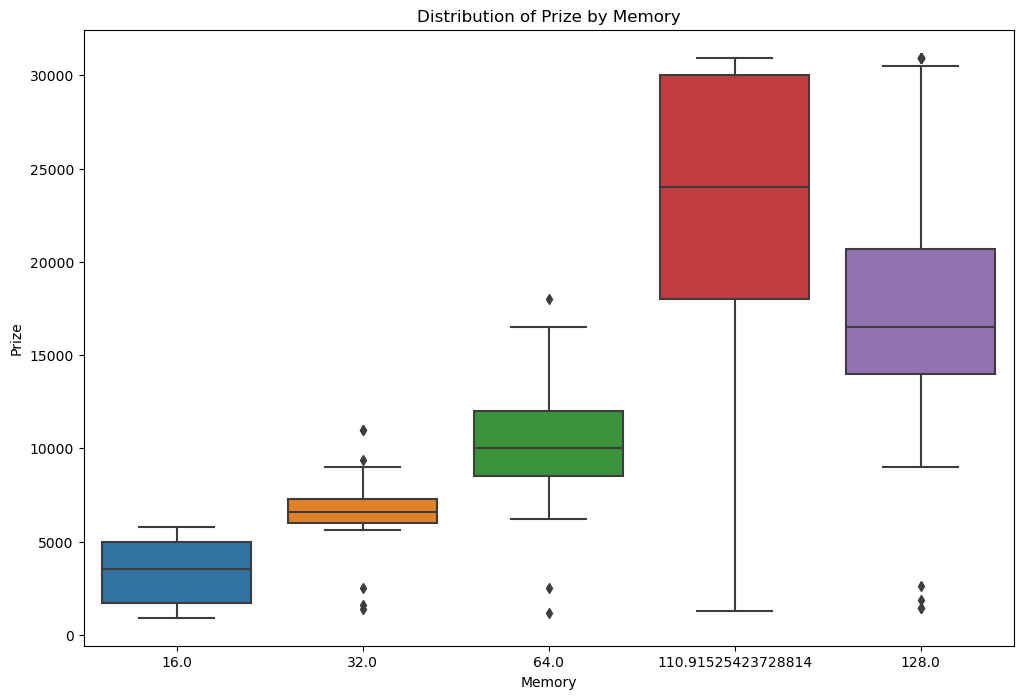

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Memory', y='Prize', data=data)
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.title('Distribution of Prize by Memory')
plt.show()

c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


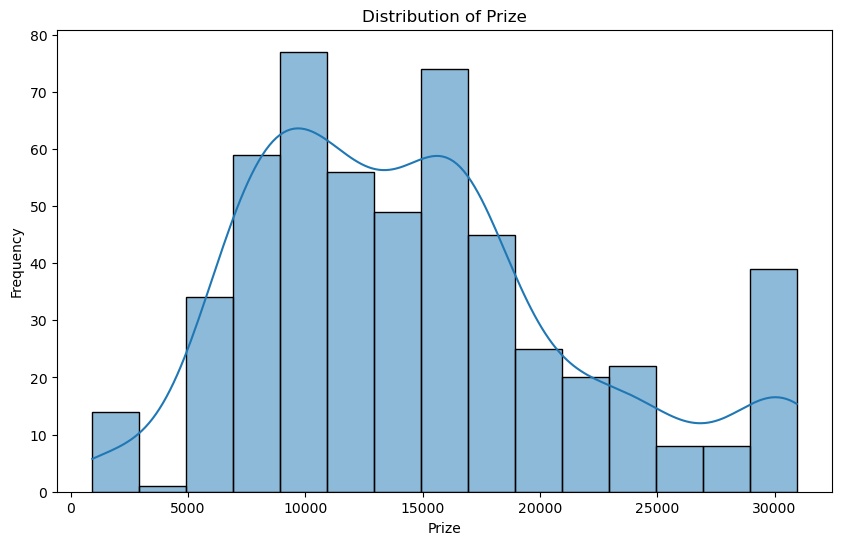

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Prize'], kde=True)
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.title('Distribution of Prize')
plt.show()

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler= MinMaxScaler()
encoding_data = data.copy()
encoding_data = pd.DataFrame(scaler.fit_transform(encoding_data), columns=encoding_data.columns)
encoding_data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Memory_price,RAM_price,Battery_price
0,0.123656,0.580292,0.428571,0.333333,0.0,0.230769,0.833333,0.534271,0.926230,0.212453,0.068870,0.079323,0.099266
1,0.123656,0.072993,0.428571,0.333333,0.0,0.230769,0.833333,0.534271,0.926230,0.212453,0.068870,0.079323,0.099266
2,0.198925,0.543796,1.000000,1.000000,1.0,0.769231,0.333333,0.449912,0.614754,0.368986,0.090636,0.098802,0.050427
3,0.370968,0.733577,0.142857,0.000000,1.0,1.000000,0.833333,0.393673,0.459016,0.157499,0.033300,0.047492,0.141554
4,0.064516,0.474453,1.000000,1.000000,1.0,0.769231,0.833333,0.534271,0.114754,0.269071,0.131393,0.135275,0.077452


In [65]:
encoding_data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Memory_price,RAM_price,Battery_price
0,0.123656,0.580292,0.428571,0.333333,0.0,0.230769,0.833333,0.534271,0.926230,0.212453,0.068870,0.079323,0.099266
1,0.123656,0.072993,0.428571,0.333333,0.0,0.230769,0.833333,0.534271,0.926230,0.212453,0.068870,0.079323,0.099266
2,0.198925,0.543796,1.000000,1.000000,1.0,0.769231,0.333333,0.449912,0.614754,0.368986,0.090636,0.098802,0.050427
3,0.370968,0.733577,0.142857,0.000000,1.0,1.000000,0.833333,0.393673,0.459016,0.157499,0.033300,0.047492,0.141554
4,0.064516,0.474453,1.000000,1.000000,1.0,0.769231,0.833333,0.534271,0.114754,0.269071,0.131393,0.135275,0.077452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.634409,0.178832,0.847458,1.000000,0.0,0.769231,0.166667,0.316358,0.729508,0.512424,0.046337,0.069904,0.027510
527,0.172043,0.189781,0.142857,0.000000,0.0,0.846154,0.500000,0.316358,0.557377,0.169123,0.029523,0.044112,0.127444
528,0.661290,0.945255,0.428571,0.333333,1.0,0.769231,1.000000,0.534271,0.286885,0.302077,0.041801,0.055099,0.066729
529,0.591398,0.062044,1.000000,1.000000,1.0,0.769231,0.583333,0.182777,0.090164,0.512424,0.058345,0.069904,0.029015


In [66]:
encoding_data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
Mobile Height    0
Processor_       0
Prize            0
Memory_price     0
RAM_price        0
Battery_price    0
dtype: int64

In [67]:
encoding_data.dropna(inplace=True)

In [68]:
encoding_data['Memory_price'].isnull().sum().mean()*100

0.0

In [69]:
encoding_data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
Mobile Height    0
Processor_       0
Prize            0
Memory_price     0
RAM_price        0
Battery_price    0
dtype: int64

In [70]:
encoding_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'Mobile Height', 'Processor_', 'Prize', 'Memory_price',
       'RAM_price', 'Battery_price'],
      dtype='object')

In [71]:
encoding_data['Memory_price'] = encoding_data['Memory'] / encoding_data['Prize']

In [72]:
encoding_data['RAM_price'] = encoding_data['RAM'] / encoding_data['Prize']

In [73]:
data[['Memory_price', 'RAM_price']]

,Memory_price,RAM_price
0,0.008768,0.000548
1,0.008768,0.000548
2,0.010668,0.000667
3,0.005665,0.000354
4,0.014224,0.000889
...,...,...
536,0.006802,0.000491
537,0.005335,0.000333
538,0.006406,0.000400
539,0.007850,0.000491


In [74]:
selected_features = encoding_data[['Memory_price', 'RAM_price', 'Battery_price']]
x = selected_features
y = encoding_data['Prize']

In [75]:
x

,Memory_price,RAM_price,Battery_price
0,2.017255,1.568976,0.099266
1,2.017255,1.568976,0.099266
2,2.710127,2.710127,0.050427
3,0.907033,0.000000,0.141554
4,3.716487,3.716487,0.077452
...,...,...,...
526,1.653822,1.951510,0.027510
527,0.844694,0.000000,0.127444
528,1.418751,1.103473,0.066729
529,1.951510,1.951510,0.029015


In [76]:
y

0      0.212453
1      0.212453
2      0.368986
3      0.157499
4      0.269071
         ...   
526    0.512424
527    0.169123
528    0.302077
529    0.512424
530    0.502206
Name: Prize, Length: 531, dtype: float64

In [77]:
corr = encoding_data.corr()

In [78]:
corr_with_Prize = corr['Prize'].sort_values(ascending=False)

In [79]:
print(corr_with_Prize.tail(10))

Mobile Height    0.156250
Model            0.111235
Colour           0.061354
Rear Camera      0.050054
Processor_      -0.090924
Battery_        -0.182160
RAM_price       -0.206860
Memory_price    -0.244687
Front Camera    -0.388559
Battery_price   -0.580020
Name: Prize, dtype: float64


In [80]:

# Check for missing values
missing_values = data.isnull().sum()

# Print missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Optionally, check the percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

Missing Values in Each Column:
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
Mobile Height    0
Processor_       0
Prize            0
Memory_price     0
RAM_price        0
Battery_price    0
dtype: int64

Percentage of Missing Values:
Model            0.0
Colour           0.0
Memory           0.0
RAM              0.0
Battery_         0.0
Rear Camera      0.0
Front Camera     0.0
Mobile Height    0.0
Processor_       0.0
Prize            0.0
Memory_price     0.0
RAM_price        0.0
Battery_price    0.0
dtype: float64


In [83]:
encoding_data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
Mobile Height    0
Processor_       0
Prize            0
Memory_price     1
RAM_price        0
Battery_price    0
dtype: int64

In [84]:
encoding_data.dropna(inplace=True)

In [85]:
encoding_data['Memory_price'].isnull().sum().mean()*100 # 0.0

0.0

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X=encoding_data.drop('Prize', axis=1)
Y=encoding_data['Prize']

In [92]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Memory_price,RAM_price,Battery_price
0,0.123656,0.580292,0.428571,0.333333,0.0,0.230769,0.833333,0.534271,0.926230,2.017255,1.568976,0.099266
1,0.123656,0.072993,0.428571,0.333333,0.0,0.230769,0.833333,0.534271,0.926230,2.017255,1.568976,0.099266
2,0.198925,0.543796,1.000000,1.000000,1.0,0.769231,0.333333,0.449912,0.614754,2.710127,2.710127,0.050427
3,0.370968,0.733577,0.142857,0.000000,1.0,1.000000,0.833333,0.393673,0.459016,0.907033,0.000000,0.141554
4,0.064516,0.474453,1.000000,1.000000,1.0,0.769231,0.833333,0.534271,0.114754,3.716487,3.716487,0.077452
...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.634409,0.178832,0.847458,1.000000,0.0,0.769231,0.166667,0.316358,0.729508,1.653822,1.951510,0.027510
527,0.172043,0.189781,0.142857,0.000000,0.0,0.846154,0.500000,0.316358,0.557377,0.844694,0.000000,0.127444
528,0.661290,0.945255,0.428571,0.333333,1.0,0.769231,1.000000,0.534271,0.286885,1.418751,1.103473,0.066729
529,0.591398,0.062044,1.000000,1.000000,1.0,0.769231,0.583333,0.182777,0.090164,1.951510,1.951510,0.029015


In [93]:
Y

0      0.212453
1      0.212453
2      0.368986
3      0.157499
4      0.269071
         ...   
526    0.512424
527    0.169123
528    0.302077
529    0.512424
530    0.502206
Name: Prize, Length: 530, dtype: float64

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [95]:
X_train

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Memory_price,RAM_price,Battery_price
137,0.827957,0.642336,1.000000,1.000000,1.0,0.769231,0.333333,0.569420,0.778689,1.300988,1.300988,0.009891
527,0.172043,0.189781,0.142857,0.000000,0.0,0.846154,0.500000,0.316358,0.557377,0.844694,0.000000,0.127444
418,0.021505,0.430657,1.000000,1.000000,0.0,0.769231,1.000000,0.000000,0.131148,1.951510,1.951510,0.027510
518,0.575269,0.105839,1.000000,0.666667,1.0,0.769231,1.000000,0.534271,0.573770,1.811056,1.207371,0.024947
69,0.790323,0.233577,0.142857,0.166667,1.0,1.000000,0.833333,0.358524,0.950820,0.768840,0.896980,0.119033
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.483871,0.434307,0.142857,0.000000,1.0,1.000000,0.833333,0.393673,0.459016,0.797426,0.000000,0.123785
106,0.118280,0.291971,1.000000,1.000000,1.0,0.076923,0.333333,0.717047,0.409836,1.991213,1.991213,0.030159
271,0.962366,0.240876,1.000000,0.333333,1.0,0.230769,0.833333,0.379613,0.532787,2.487614,0.829205,0.044242
436,0.623656,0.609489,1.000000,1.000000,0.0,0.153846,0.583333,0.182777,1.000000,1.000000,1.000000,0.000000


In [96]:
X_test

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Memory_price,RAM_price,Battery_price
140,0.053763,0.813869,0.428571,0.333333,1.0,0.769231,1.000000,0.534271,0.057377,1.216379,0.946072,0.053952
399,0.107527,0.795620,0.428571,0.666667,1.0,0.769231,0.333333,0.717047,0.409836,0.913990,1.421763,0.034212
6,0.064516,0.551095,1.000000,1.000000,1.0,0.769231,0.833333,0.534271,0.114754,3.716487,3.716487,0.077452
335,0.962366,0.240876,0.428571,0.166667,1.0,0.230769,0.833333,0.379613,0.532787,1.343363,0.522419,0.062009
323,0.715054,0.985401,1.000000,1.000000,0.0,0.769231,0.333333,0.449912,0.713115,1.015095,1.015095,0.000449
...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.161290,0.164234,0.847458,1.000000,1.0,0.769231,0.333333,0.857645,0.360656,1.489861,1.758036,0.023403
432,0.586022,0.069343,0.847458,1.000000,1.0,0.692308,0.250000,0.534271,0.032787,0.847458,1.000000,0.000793
131,0.016129,0.131387,1.000000,0.666667,0.0,0.153846,1.000000,0.316358,0.122951,1.069322,0.712882,0.002057
339,0.489247,0.708029,0.847458,1.000000,0.0,0.923077,0.333333,0.534271,0.065574,1.102532,1.300988,0.008869


In [97]:
Y_train

137    0.768647
527    0.169123
418    0.512424
518    0.552164
69     0.185809
         ...   
71     0.179148
106    0.502206
271    0.401992
436    1.000000
102    0.602122
Name: Prize, Length: 424, dtype: float64

In [98]:
Y_test

140    0.352334
399    0.468901
6      0.269071
335    0.319029
323    0.985129
         ...   
342    0.568817
432    1.000000
131    0.935172
339    0.768647
515    0.512424
Name: Prize, Length: 106, dtype: float64

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
model1 = RandomForestRegressor()

In [101]:
model1.fit(X_train, Y_train)

RandomForestRegressor()

In [102]:
y_pred = model1.predict(X_test)

In [103]:
y_pred

array([0.35212802, 0.46906796, 0.26898803, 0.32770878, 0.99043446,
       0.36897038, 0.25305157, 0.3022764 , 0.29295499, 0.6328664 ,
       0.28662004, 0.50203993, 0.43559641, 0.51242364, 0.28662004,
       0.26926379, 0.36857738, 0.46990058, 0.86499475, 0.5158914 ,
       0.25111922, 0.29136367, 0.50203993, 0.05896022, 0.40196733,
       0.51251849, 0.56831693, 0.30236432, 0.20950026, 0.40162229,
       0.51827979, 0.4865531 , 0.4865531 , 0.38613845, 0.23114819,
       0.45158748, 0.2532977 , 0.50220646, 0.23580756, 0.40302743,
       0.43559641, 0.18428203, 0.4189409 , 0.46923448, 0.5175719 ,
       0.26982498, 0.96846947, 0.33581056, 0.97959335, 0.36897038,
       0.51248799, 0.45114686, 0.26929876, 0.28642021, 0.2021605 ,
       0.53550848, 0.98511232, 0.30237631, 0.79938685, 0.90749996,
       0.51242364, 0.7689797 , 0.19448369, 0.50450731, 0.43559641,
       0.4018028 , 0.36857138, 0.43559641, 0.16634361, 0.53550549,
       0.45254634, 0.20251286, 0.45152054, 0.30236432, 0.53549

In [104]:
score = model1.score(X_test, Y_test)
print(f'Model Score: {score}')

Model Score: 0.9989987399241107


In [105]:
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.9032903419777586e-05
R-squared: 0.9989987399241107


In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model2 = LinearRegression()

In [109]:
model2.fit(X_train, Y_train)

LinearRegression()

In [110]:
y_pred = model2.predict(X_test)

In [111]:
y_pred

array([0.25494395, 0.51574283, 0.41828297, 0.34159388, 0.76777473,
       0.44517033, 0.36350593, 0.31724462, 0.25000551, 0.71534078,
       0.42195811, 0.34025826, 0.5510546 , 0.63308972, 0.42423773,
       0.27661559, 0.56186422, 0.58150561, 0.69104263, 0.49759674,
       0.31864512, 0.39015531, 0.6585692 , 0.14470787, 0.41723229,
       0.5489205 , 0.68524047, 0.28105073, 0.24649303, 0.58766924,
       0.57593619, 0.52507166, 0.4209343 , 0.53252799, 0.29619626,
       0.41991332, 0.29874786, 0.59260995, 0.23824125, 0.49540879,
       0.57724905, 0.26747615, 0.46494456, 0.37422129, 0.44649666,
       0.31646248, 0.67225548, 0.42357733, 0.48507435, 0.44165321,
       0.74125164, 0.38553206, 0.29338792, 0.43335619, 0.16005703,
       0.54278081, 0.67270477, 0.33627467, 0.75262955, 0.72207436,
       0.78656655, 0.73823182, 0.22412692, 0.59876569, 0.56207333,
       0.37724662, 0.39847477, 0.40303026, 0.16134306, 0.53998014,
       0.67943254, 0.18627401, 0.50676431, 0.28762905, 0.47099

In [112]:
score = model2.score(X_test, Y_test)
print(f'model2 Score: {score}')

model2 Score: 0.6475376501904464


In [113]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0172605028138875
R-squared: 0.6475376501904464


In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
model3 = DecisionTreeRegressor()

In [116]:
model3.fit(X_train, Y_train)

DecisionTreeRegressor()

In [117]:
y_pred = model3.predict(X_test)

In [118]:
y_pred

array([0.35233385, 0.46890143, 0.26907129, 0.31902883, 1.        ,
       0.36898636, 0.25241878, 0.30237631, 0.29238481, 0.63542655,
       0.2857238 , 0.50220646, 0.43559641, 0.51242364, 0.2857238 ,
       0.26907129, 0.36898636, 0.46890143, 0.86856172, 0.51885897,
       0.25075353, 0.29541556, 0.50220646, 0.05645202, 0.40199164,
       0.51242364, 0.56881651, 0.30237631, 0.21181995, 0.40229139,
       0.51885897, 0.48555395, 0.48555395, 0.38563887, 0.22744001,
       0.45194918, 0.25241878, 0.50220646, 0.23576627, 0.40229139,
       0.43559641, 0.17914772, 0.4189439 , 0.46890143, 0.51885897,
       0.26907129, 0.96847679, 0.33568134, 0.95182428, 0.36898636,
       0.51242364, 0.45224892, 0.26907129, 0.2857238 , 0.20246124,
       0.53551148, 0.96847679, 0.30237631, 0.80195167, 0.91182495,
       0.51242364, 0.76864665, 0.19580024, 0.50220646, 0.43559641,
       0.40199164, 0.36898636, 0.43559641, 0.16915622, 0.53551148,
       0.45194918, 0.20246124, 0.45194918, 0.30237631, 0.53551

In [119]:
score = model3.score(X_test, Y_test)
print(f'model3 Score: {score}')

model3 Score: 0.9996645923752047


In [120]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.6425312532552612e-05
R-squared: 0.9996645923752047


In [121]:
from sklearn.svm import SVR


In [122]:
model4 = SVR()

In [123]:
model4.fit(X_train, Y_train)

SVR()

In [124]:
y_pred = model4.predict(X_test)

In [125]:
y_pred

array([ 0.35530523,  0.52578637,  0.20514637,  0.346336  ,  0.86162017,
        0.4457456 ,  0.34761868,  0.31667069,  0.29558066,  0.71233804,
        0.38634137,  0.43152881,  0.50685921,  0.60569905,  0.38601543,
        0.30623733,  0.41826419,  0.53211954,  0.77165512,  0.51591007,
        0.26954426,  0.42852802,  0.60543303, -0.10839791,  0.3890935 ,
        0.57434224,  0.65083116,  0.32894453,  0.30220145,  0.46951819,
        0.57835484,  0.51578151,  0.44449001,  0.49588995,  0.25858632,
        0.44602801,  0.28879379,  0.56050254,  0.25587909,  0.46301767,
        0.50244678,  0.34479273,  0.42301998,  0.42984832,  0.52102895,
        0.3163698 ,  0.77643678,  0.40812611,  0.7061639 ,  0.44581345,
        0.65261532,  0.44592156,  0.30957895,  0.38403363,  0.18428907,
        0.5667312 ,  0.77056978,  0.32473582,  0.80459384,  0.82543235,
        0.67381766,  0.795839  ,  0.33179548,  0.60282594,  0.50268637,
        0.36301424,  0.36373821,  0.43347295,  0.26691689,  0.56

In [126]:
score = model4.score(X_test, Y_test)
print(f'model4 Score: {score}')

model4 Score: 0.8520307073280868


In [127]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.007246233232890035
R-squared: 0.8520307073280868


In [128]:
# knn model
from sklearn.neighbors import KNeighborsRegressor


In [129]:
model5 = KNeighborsRegressor()

In [130]:
model5.fit(X_test, Y_test)

KNeighborsRegressor()

In [131]:
y_pred = model5.predict(X_test)

In [132]:
y_pred

array([0.29765366, 0.61544354, 0.38230837, 0.30428136, 0.84443556,
       0.33568134, 0.26440859, 0.31236782, 0.2786698 , 0.58213852,
       0.26440859, 0.51552847, 0.43559641, 0.49828531, 0.26440859,
       0.26907129, 0.4289354 , 0.62210454, 0.93445904, 0.38435181,
       0.26075836, 0.2574545 , 0.50424989, 0.29232486, 0.43226591,
       0.5175719 , 0.54754642, 0.31763668, 0.2707099 , 0.43892691,
       0.48888445, 0.49887596, 0.49554545, 0.63252236, 0.22577476,
       0.49554545, 0.26368254, 0.49221495, 0.23243576, 0.36232536,
       0.46557093, 0.23317513, 0.45890993, 0.36232536, 0.49887596,
       0.27567235, 0.72201962, 0.38295966, 0.93962798, 0.32069408,
       0.51160732, 0.49554545, 0.2823933 , 0.33568134, 0.38435181,
       0.53884198, 0.87634844, 0.30405489, 0.85470017, 0.90911392,
       0.50161581, 0.85470017, 0.30767181, 0.39838505, 0.45224892,
       0.45224892, 0.4289354 , 0.44558792, 0.24173453, 0.53884198,
       0.51160732, 0.24173453, 0.49221495, 0.2786698 , 0.49554

In [133]:
score = model5.score(X_test, Y_test)
print(f'model5 Score: {score}')

model5 Score: 0.8940563430288564


In [134]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.005188187590112894
R-squared: 0.8940563430288564


In [ ]:
num_features = X_train.shape[1]
# Manually define feature values for prediction (Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Rear_Camera_MP,
#                                                      Front_Camera_MP,price_per_ram,price_per_memory)


mobile_price = np.array([23,159,64.000000,4.0,4873.877589,3,10,16.760000,113,7299.000000,0.008768,0.006250])

mobile_price = mobile_price.reshape(1, num_features)# Reshape it to match model input shape (1 sample, num_features)

predicted_price = model1.predict(mobile_price)# Predict Mobile price

print(f"Predicted Price: ${predicted_price[0]:,.4f}")

Predicted Price: $0.8469


c:\Users\HP\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [162]:
data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Memory_price,RAM_price,Battery_price
0,23,159,64.0,4.0,4873.877589,3,10,16.76,113,7299.0,0.008768,0.000548,0.667746
1,23,20,64.0,4.0,4873.877589,3,10,16.76,113,7299.0,0.008768,0.000548,0.667746
2,37,149,128.0,8.0,5000.000000,10,4,16.64,75,11999.0,0.010668,0.000667,0.416701
3,69,201,32.0,2.0,5000.000000,13,10,16.56,56,5649.0,0.005665,0.000354,0.885112
4,12,130,128.0,8.0,5000.000000,10,10,16.76,14,8999.0,0.014224,0.000889,0.555617


In [163]:
# Compute average prize by year
avg_price_by_Memory = data.groupby('Memory')['Prize'].mean()

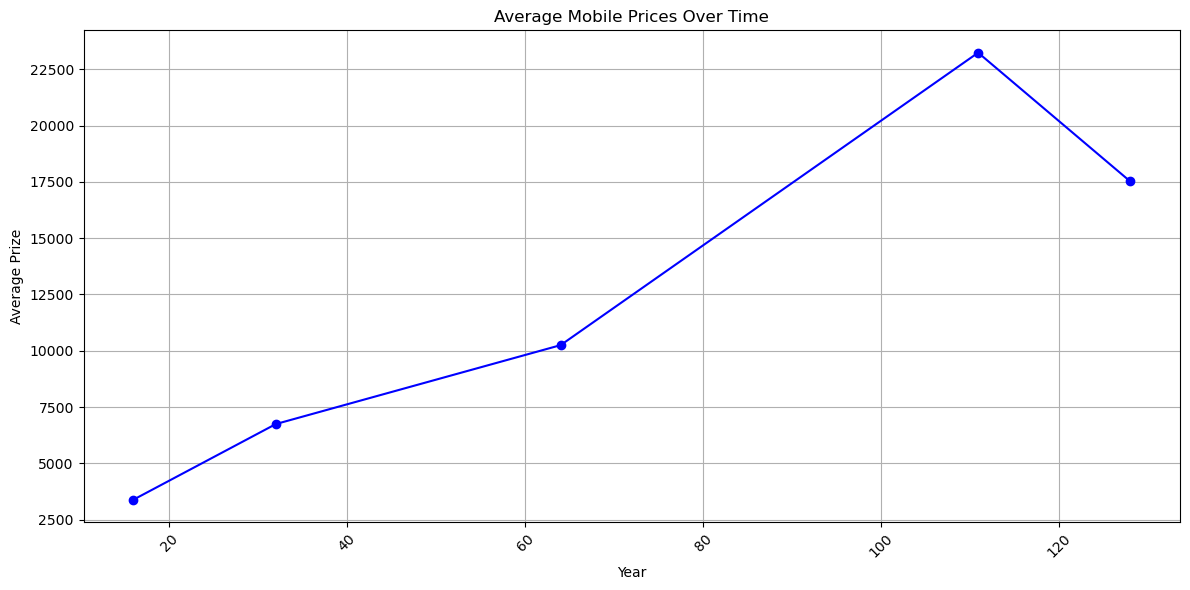

In [164]:
# Plotting the average prize over time
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_Memory.index, avg_price_by_Memory.values, marker='o', color='b', linestyle='-')
plt.title('Average Mobile Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Prize')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

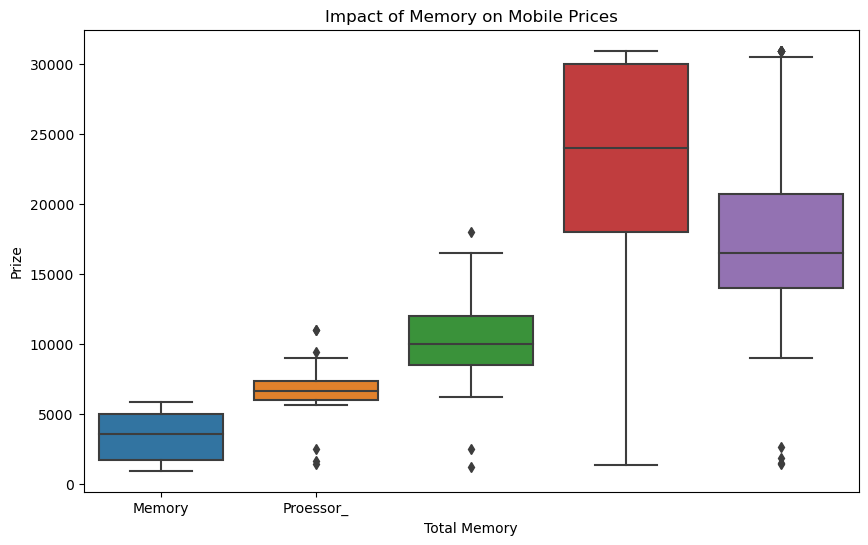

In [165]:
# Display the Boxplot for Impact of Memory on Mobile Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Memory', y='Prize', data=data)
plt.title('Impact of Memory on Mobile Prices')
plt.xlabel('Total Memory')
plt.ylabel('Prize')
plt.xticks([0, 1], ['Memory', 'Proessor_'])  # Ensure categories match dataset
plt.show()
